In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/New%20folder/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df=df.fillna(0)

In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,3.107787,3.957069,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405
std,6.482693,7.407808,8.389771,4.163070,4.680785,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000
50%,11.900000,22.500000,0.000000,1.600000,0.100000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.069546,6.482693,-8.5,7.5,11.9,16.8,33.9
MaxTemp,145460.0,23.020041,7.407808,-4.8,17.8,22.5,28.2,48.1
Rainfall,145460.0,2.307990,8.389771,0.0,0.0,0.0,0.6,371.0
Evaporation,145460.0,3.107787,4.163070,0.0,0.0,1.6,5.2,145.0
Sunshine,145460.0,3.957069,4.680785,0.0,0.0,0.1,8.7,14.5
WindGustSpeed,145460.0,37.210525,16.649265,0.0,30.0,37.0,46.0,135.0
WindSpeed9am,145460.0,13.872831,8.993610,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,145460.0,18.269799,9.119006,0.0,11.0,17.0,24.0,87.0
Humidity9am,145460.0,67.624062,20.987869,0.0,56.0,69.0,83.0,100.0
Humidity3pm,145460.0,49.942204,22.334356,0.0,35.0,51.0,65.0,100.0


In [11]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
df = df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)

In [14]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [15]:
dummies=pd.get_dummies(df['RainToday'])
dummies

,0,No,Yes
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
145455,0,1,0
145456,0,1,0
145457,0,1,0
145458,0,1,0


In [16]:
RainToday=pd.concat([df,dummies],axis='columns')
RainToday

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,0,No,Yes
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.0,0.0,16.9,21.8,No,No,0,1,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,1007.8,0.0,0.0,17.2,24.3,No,No,0,1,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,1008.7,0.0,2.0,21.0,23.2,No,No,0,1,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,1012.8,0.0,0.0,18.1,26.5,No,No,0,1,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.0,8.0,17.8,29.7,No,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,...,1020.3,0.0,0.0,10.1,22.4,No,No,0,1,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,...,1019.1,0.0,0.0,10.9,24.5,No,No,0,1,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,...,1016.8,0.0,0.0,12.5,26.1,No,No,0,1,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,...,1016.5,3.0,2.0,15.1,26.0,No,No,0,1,0


In [17]:
var=RainToday.drop(['RainToday','Yes'],axis='columns')
var

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,0,No
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0,1
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0,1
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0,1
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,0,1
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,0,1
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,0,1
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,0,1
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0,1


In [18]:
df1=var.rename({'No':'RainToday'},axis=1)

In [19]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,0,RainToday
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0,1
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0,1
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0,1
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,0,1
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,0,1
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,0,1
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,0,1
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0,1


In [20]:
dummies12=pd.get_dummies(df1['RainTomorrow'])

In [21]:
var12=pd.concat([df1,dummies12],axis='columns')
var12

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,0,RainToday,0,No,Yes
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,8.0,0.0,16.9,21.8,No,0,1,0,1,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,17.2,24.3,No,0,1,0,1,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,0.0,2.0,21.0,23.2,No,0,1,0,1,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,18.1,26.5,No,0,1,0,1,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,7.0,8.0,17.8,29.7,No,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,...,0.0,0.0,10.1,22.4,No,0,1,0,1,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,...,0.0,0.0,10.9,24.5,No,0,1,0,1,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,...,0.0,0.0,12.5,26.1,No,0,1,0,1,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,...,3.0,2.0,15.1,26.0,No,0,1,0,1,0


In [22]:
var12


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,0,RainToday,0,No,Yes
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,8.0,0.0,16.9,21.8,No,0,1,0,1,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,17.2,24.3,No,0,1,0,1,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,0.0,2.0,21.0,23.2,No,0,1,0,1,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,18.1,26.5,No,0,1,0,1,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,7.0,8.0,17.8,29.7,No,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,...,0.0,0.0,10.1,22.4,No,0,1,0,1,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,...,0.0,0.0,10.9,24.5,No,0,1,0,1,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,...,0.0,0.0,12.5,26.1,No,0,1,0,1,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,...,3.0,2.0,15.1,26.0,No,0,1,0,1,0


In [24]:
df01=var12.drop(['RainTomorrow'],axis='columns')
df01

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,0,RainToday,0,No,Yes
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.0,0.0,16.9,21.8,0,1,0,1,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,1007.8,0.0,0.0,17.2,24.3,0,1,0,1,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,1008.7,0.0,2.0,21.0,23.2,0,1,0,1,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,1012.8,0.0,0.0,18.1,26.5,0,1,0,1,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.0,8.0,17.8,29.7,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,...,1020.3,0.0,0.0,10.1,22.4,0,1,0,1,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,...,1019.1,0.0,0.0,10.9,24.5,0,1,0,1,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,...,1016.8,0.0,0.0,12.5,26.1,0,1,0,1,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,...,1016.5,3.0,2.0,15.1,26.0,0,1,0,1,0


In [25]:
data=df01.rename({'No':'RainTomorrow'},axis='columns')

In [26]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,0,RainToday,0,RainTomorrow,Yes
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.0,0.0,16.9,21.8,0,1,0,1,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,1007.8,0.0,0.0,17.2,24.3,0,1,0,1,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,1008.7,0.0,2.0,21.0,23.2,0,1,0,1,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,1012.8,0.0,0.0,18.1,26.5,0,1,0,1,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.0,8.0,17.8,29.7,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,...,1020.3,0.0,0.0,10.1,22.4,0,1,0,1,0
145456,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,...,1019.1,0.0,0.0,10.9,24.5,0,1,0,1,0
145457,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,...,1016.8,0.0,0.0,12.5,26.1,0,1,0,1,0
145458,7.8,27.0,0.0,0.0,0.0,28.0,13.0,7.0,51.0,24.0,...,1016.5,3.0,2.0,15.1,26.0,0,1,0,1,0


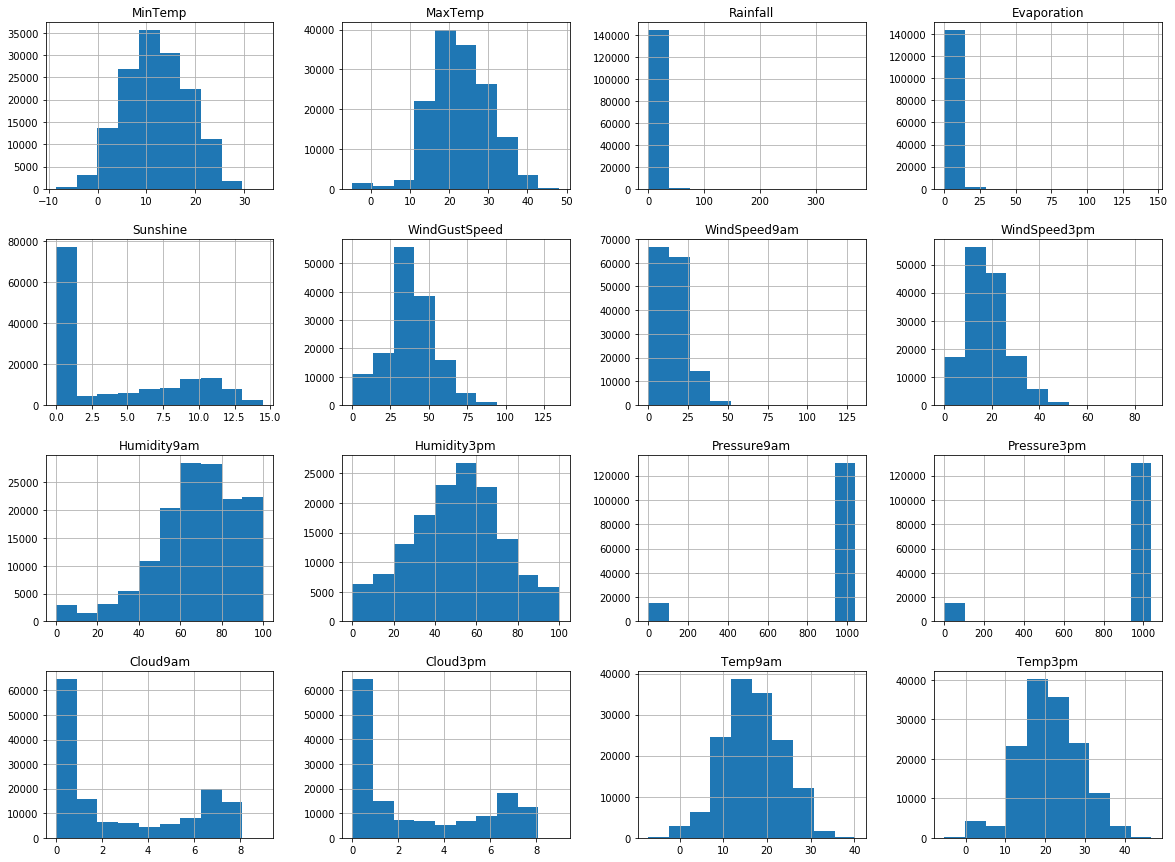

In [27]:
df.hist(figsize=(20,15))
plt.show()

In [54]:
x=data.drop(['Yes'],axis=1)
y=data.RainTomorrow.values

In [55]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,0,RainToday,0,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,1,0,1
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,1,0,1
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,1,0,1
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,1,0,1
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,1


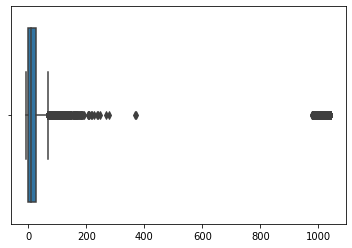

In [30]:
sns.boxplot(data)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [32]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
li.score(xtest,ytest)

1.0

In [34]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lo.score(xtest,ytest)

0.8535450753930061

In [36]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
tre.score(xtest,ytest)

1.0

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc.score(xtest,ytest)

1.0

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
gau.score(xtest,ytest)

0.9902607818873459

In [44]:
from sklearn.naive_bayes import BernoulliNB

In [45]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [56]:
ber.score(xtest,ytest)

0.9946377010862093